<a href="https://colab.research.google.com/github/SpecRat/my-colab-projects/blob/main/pixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONTENTS 
* setup https://colab.research.google.com/drive/11h_2WiBnL9a1SBGd9EoOC7ZH1VF3WPl4#scrollTo=7mIUskP49xvW
* rules
  * wireworld https://colab.research.google.com/drive/11h_2WiBnL9a1SBGd9EoOC7ZH1VF3WPl4#scrollTo=Ikc9XZb-N6G6
  * game of life https://colab.research.google.com/drive/11h_2WiBnL9a1SBGd9EoOC7ZH1VF3WPl4#scrollTo=3487GCcgtKtw
* randomnes https://colab.research.google.com/drive/11h_2WiBnL9a1SBGd9EoOC7ZH1VF3WPl4#scrollTo=3QSsQRdgLGa9

In [ ]:
import copy
from PIL import Image
import numpy as np
from IPython.display import Javascript

#colors based on 16 ansi colors see https://en.wikipedia.org/wiki/ANSI_escape_code#Colors on how to add or change colors.
black = "\33[40m  "   #1
red = "\33[41m  "     #2
green = "\33[42m  "   #3
yellow = "\33[43m  "  #4
blue = "\33[44m  "    #5
purple = "\33[45m  "  #6
cyan = "\33[46m  "  #7
white = "\33[47m  "   #8
gray = "\33[100m  "   #9
Lred = "\33[101m  "     #A    
Lgreen = "\33[102m  "   #B
Lyellow = "\33[103m  "  #C
Lblue = "\33[104m  "    #D
Lpurple = "\33[105m  "  #E
Lcyan = "\33[106m  "  #F
Lwhite = "\33[107m  "   #0
#grid res
Y = 36 #↕ 
X = 38 #↔ 
grid = [] #used to define empty grid array TODO impliment numpy or something to ADD WRAP AROUND AND MAKE TORIODAL
colors = [black, red, green, yellow, blue, purple, cyan, white, gray,Lred,Lgreen,Lyellow,Lblue,Lpurple,Lcyan,Lwhite] #used for random noise later on
lcolors = len(colors) 

def blankgrid():
  '''fill entire grid with black'''
  for j in range(Y):
    grid.append([])
    for k in range(X):
      grid[j].append(black)

def getvalue(S, i, j):
  '''simple work around for outofbounds''' #should be fine for nonwrapping arrays, but id like to impliment wraping,
  try:
      return S[i][j]
  except IndexError:
      return black

def frameprint(): 
  '''display grid'''
  newline = ''
  for i in range(Y):
    for j in range(X):
      newline = newline + grid[i][j]
    print(newline)
    newline = ''

def checkadjacent(x,y, s,): 
  '''von neumann(cells adjacent) neighborhood and s can be toggled to add moores(adjacent+corners) neighborhod''' #TODO von neumann extended
  adjacent = []
  adjacent.append(getvalue(grid, x -1,y))
  adjacent.append(getvalue(grid, x, y-1))
  adjacent.append(getvalue(grid, x +1,y))
  adjacent.append(getvalue(grid, x ,y+1))
  if s == "all":
    adjacent.append(getvalue(grid, x -1, y-1))
    adjacent.append(getvalue(grid, x -1, y+1))
    adjacent.append(getvalue(grid, x +1, y+1))
    adjacent.append(getvalue(grid, x +1, y-1)) 
    #print(adjacent)
  return adjacent
  adjacent = []

def adjust_font():#!!!set to at least ten for legible error messages!!! 
  '''set outputbox font size'''
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '7px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', adjust_font) #corrects font prior to runing any cell #1,2,7,10, are all seamless RUN IT TWICE
blankgrid()
print("""         _____                   _______                   _____                    _____          \n         /\\    \\                 /::\\    \\                 /\\    \\                  /\\    \\         \n        /::\\    \\               /::::\\    \\               /::\\____\\                /::\\    \\        \n       /::::\\    \\             /::::::\\    \\             /::::|   |               /::::\\    \\       \n      /::::::\\    \\           /::::::::\\    \\           /:::::|   |              /::::::\\    \\      \n     /:::/\\:::\\    \\         /:::/~~\\:::\\    \\         /::::::|   |             /:::/\\:::\\    \\     \n    /:::/  \\:::\\    \\       /:::/    \\:::\\    \\       /:::/|::|   |            /:::/__\\:::\\    \\    \n   /:::/    \\:::\\    \\     /:::/    / \\:::\\    \\     /:::/ |::|   |           /::::\\   \\:::\\    \\   \n  /:::/    / \\:::\\    \\   /:::/____/   \\:::\\____\\   /:::/  |::|   | _____    /::::::\\   \\:::\\    \\  \n /:::/    /   \\:::\\ ___\\ |:::|    |     |:::|    | /:::/   |::|   |/\\    \\  /:::/\\:::\\   \\:::\\    \\ \n/:::/____/     \\:::|    ||:::|____|     |:::|    |/:: /    |::|   /::\\____\\/:::/__\\:::\\   \\:::\\____\\\n\\:::\\    \\     /:::|____| \\:::\\    \\   /:::/    / \\::/    /|::|  /:::/    /\\:::\\   \\:::\\   \\::/    /\n \\:::\\    \\   /:::/    /   \\:::\\    \\ /:::/    /   \\/____/ |::| /:::/    /  \\:::\\   \\:::\\   \\/____/ \n  \\:::\\    \\ /:::/    /     \\:::\\    /:::/    /            |::|/:::/    /    \\:::\\   \\:::\\    \\     \n   \\:::\\    /:::/    /       \\:::\\__/:::/    /             |::::::/    /      \\:::\\   \\:::\\____\\    \n    \\:::\\  /:::/    /         \\::::::::/    /              |:::::/    /        \\:::\\   \\::/    /    \n     \\:::\\/:::/    /           \\::::::/    /               |::::/    /          \\:::\\   \\/____/     \n      \\::::::/    /             \\::::/    /                /:::/    /            \\:::\\    \\         \n       \\::::/    /               \\::/____/                /:::/    /              \\:::\\____\\        \n        \\::/____/                 ~~                      \\::/    /                \\::/    /        \n         ~~                                                \\/____/                  \\/____/         \n                                                                                                  \n\n
""")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         _____                   _______                   _____                    _____          
         /\    \                 /::\    \                 /\    \                  /\    \         
        /::\    \               /::::\    \               /::\____\                /::\    \        
       /::::\    \             /::::::\    \             /::::|   |               /::::\    \       
      /::::::\    \           /::::::::\    \           /:::::|   |              /::::::\    \      
     /:::/\:::\    \         /:::/~~\:::\    \         /::::::|   |             /:::/\:::\    \     
    /:::/  \:::\    \       /:::/    \:::\    \       /:::/|::|   |            /:::/__\:::\    \    
   /:::/    \:::\    \     /:::/    / \:::\    \     /:::/ |::|   |           /::::\   \:::\    \   
  /:::/    / \:::\    \   /:::/____/   \:::\____\   /:::/  |::|   | _____    /::::::\   \:::\    \  
 /:::/    /   \:::\ ___\ |:::|    |     |:::|    | /:::/   |::|   |/\    \  /:::/\:::\   \::

**how to create and import maps:** 
1. open http://piskelapp.com/p/create 
2. click resize and change the size to desired area you want your map to be.

 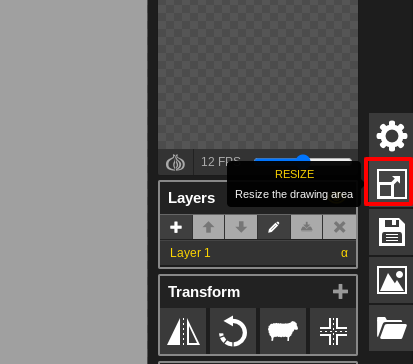
   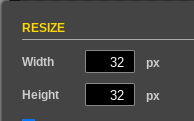

  as of now I prefer 32 by 32 and set the default to it, feel free to choose anysize, but this will cause the program to run slower if you do change the size and the output is to big you can always change the value in cell one on line 73 and call `adjust_font()`
3. download the file from  https://drive.google.com/file/d/1DUSaMsFMW5b-mT_c0XF1Peh_nbWqB8Qo/view?usp=sharing  (TODO sourcecode?)
4. click the plus next to the create new pallete

  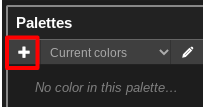
5. click import from file and select the file you just downloaded called `pixelIpynb16palet.gpl`
6. you know can draw maps for help on how to use piskel press the `?` key or watch https://youtu.be/23DwHNWxaPk?t=1186 .
7. when your done with your map export the image as a single frame png.
8. upload your map to the colab.
9. copy the path of the map and run `load_pattern("paste_path_here")`
10. run the code block! you did it!
you can also check out https://drive.google.com/drive/folders/1mZBA8ZKENERJ07jQi9AJ47XoQjC1kq83?usp=sharing for some available of patterns/maps
---



In [ ]:
def load_pattern(patternpath):
    
    im = Image.open(patternpath)
    im.load
    im_array = np.asarray(im)
    for i in range(len(im_array)):
      for j in range(len(im_array[i])):
        channel_r = im_array[i][j][0]
        channel_g = im_array[i][j][1]#improve dork code?
        channel_b = im_array[i][j][2]#VERY BAD CODE INCOMING! wait nevermind vga values and rgb values are not tied together or defined anywhere else still processor heavy i think.
        if   channel_r == 255 and channel_g == 0   and channel_b ==0 :
          grid[i][j] = Lred
        elif channel_r == 255 and channel_g == 255 and channel_b == 0 :
          grid[i][j] = Lyellow
        elif channel_r == 255 and channel_g == 255 and channel_b == 255 :
          grid[i][j] = Lwhite
        elif channel_r == 255 and channel_g == 0   and channel_b == 255 :
          grid[i][j] = Lpurple
        elif channel_r == 136 and channel_g == 0   and channel_b == 0 :
          grid[i][j] = red
        elif channel_r == 136 and channel_g == 136 and channel_b == 0 :
          grid[i][j] = yellow
        elif channel_r == 136 and channel_g == 136 and channel_b == 136 :
          grid[i][j] = gray
        elif channel_r == 136 and channel_g == 0   and channel_b == 136 :
          grid[i][j] = purple
        elif channel_r == 0   and channel_g == 0   and channel_b == 0 :
          grid[i][j] = black
        elif channel_r == 0   and channel_g == 0   and channel_b == 255 :
          grid[i][j] = Lblue
        elif channel_r == 0   and channel_g == 255 and channel_b == 255 :
          grid[i][j] = Lcyan
        elif channel_r == 0   and channel_g == 255 and channel_b == 0 :
          grid[i][j] = Lgreen
        elif channel_r == 0   and channel_g == 0   and channel_b == 136 :
          grid[i][j] = blue
        elif channel_r == 0   and channel_g == 136 and channel_b == 136 :
          grid[i][j] = cyan
        elif channel_r == 0   and channel_g == 136 and channel_b == 0 :
          grid[i][j] = green
        else: 
          grid[i][j] = gray

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#apply wireworld rule set and print after tick 
def rule_wireworld():
  global grid
  #cell states
  electron_head = Lyellow
  electron_tail = yellow
  conductor = Lwhite
  #map states used
  grid2 = copy.deepcopy(grid)
  for j in range(Y): #IF I electron head
    for k in range(X):
      if grid[j][k] == electron_head: #if electron head -> electron tail
        grid2[j][k] = electron_tail 
  for j in range(Y): #IF I electron tail
    for k in range(X):
      if grid[j][k] == electron_tail: #if electron tail -> conductor
        grid2[j][k] = conductor
  for j in range(Y): #IF I conductor
    for k in range(X):
      heads = 0
      if grid[j][k] == conductor: #if conductor and next to head -> 
        testlist = checkadjacent(j,k, "")
        for i in testlist: 
          if i == electron_head:    
            heads = heads + 1
            if heads >= 3:
              grid2[j][k] = conductor
            elif heads <= 2:
              grid2[j][k] = electron_head
  grid = copy.deepcopy(grid2)
rule_wireworld()
frameprint()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def rule_static(): #WIP
  electron_head = Lyellow
  electron_tail = yellow
  inpoot_static = cyan
  inpoot = Lcyan
  conductor = Lwhite
  led_static = purple
  led = Lpurple
  toggle_static = red
  toggle = Lred
  grid2 = copy.deepcopy(grid)
  for j in range(Y): #IF I electron head
      for k in range(X):
        if grid[j][k] == electron_head: #if electron head -> electron tail
          grid2[j][k] = electron_tail 
    for j in range(Y): #IF I electron tail
      for k in range(X):
        if grid[j][k] == electron_tail: #if electron tail -> conductor
          grid2[j][k] = conductor
    for j in range(Y): #IF I conductor
      for k in range(X):
        heads = 0
        if grid[j][k] == conductor: #if conductor and next to head -> 
          testlist = checkadjacent(j,k, "")
          if electron_head in testlist or inpoot in testlist:
            grid2[j][k] = 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndentationError: ignored

In [ ]:
#demomap load 
Y = 36
X = 36
load_pattern("/content/drive/MyDrive/Colab Notebooks/pixelproject/Patterns/life_demo.png")#TODO see if u can use google drive urls instead.
frameprint() 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#gameoflife rules
def rule_life():
  global grid
  grid2 = copy.deepcopy(grid)
  for j in range(Y): 
      for k in range(X):
        live_nieghbors = 0
        if grid[j][k] == Lwhite:
          cell_neighbors = checkadjacent(j,k, "all" )
          for i in cell_neighbors: 
            if i == Lwhite:    
              live_nieghbors = live_nieghbors + 1
          if live_nieghbors <= 1:
            grid2[j][k] = black
          elif live_nieghbors == 2:
            grid2[j][k] = Lwhite
          elif live_nieghbors == 3:
            grid2[j][k] = Lwhite
          elif live_nieghbors >= 4:
            grid2[j][k] = black
          live_nieghbors = 0
        elif grid[j][k] == black:
          cell_neighbors = checkadjacent(j,k, "all" )
          for i in cell_neighbors: 
            if i == Lwhite:    
              live_nieghbors = live_nieghbors + 1
          if live_nieghbors == 3:
            grid2[j][k] = Lwhite
        live_nieghbors = 0
  grid =  copy.deepcopy(grid2)
rule_life()
frameprint()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#apply a randomgrid pattern and display
import random
grid = []
for j in range(Y):
  grid.append([])
  for k in range(X):
    bumblefrick =  random.randrange(0,len(colors))
    grid[j].append(colors[bumblefrick])
frameprint()